<h2> Country Analysis and Clustering with K-Means & Fitting </h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as ss
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score,r2_score

# Define the custom palette
custom_palette = ['#f3e13c', '#3295b2', '#d12271', '#2c823a', '#68337b', '#dc6228', '#e8c7d4']
#Suffle the palette
suffled_palette = custom_palette[:]
random.shuffle(suffled_palette)

# Create a continuous colormap
continuous_cmap = LinearSegmentedColormap.from_list("custom_cmap", suffled_palette, N=100)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the CSV file into a DataFrame
countries = pd.read_csv('Country-data.csv')

In [5]:
# Display the first five rows
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Basic information about the dataset
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# Summary statistics
countries.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [8]:
# Check for missing values
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
# Selecting the variables
countries_select = countries[["life_expec", "health", "income", "inflation", "gdpp"]].copy()

In [10]:
countries_select.head()

,life_expec,health,income,inflation,gdpp
0,56.2,7.58,1610,9.44,553
1,76.3,6.55,9930,4.49,4090
2,76.5,4.17,12900,16.10,4460
3,60.1,2.85,5900,22.40,3530
4,76.8,6.03,19100,1.44,12200


In [44]:
# Filter countries with child mortality less than 5
low_mort_data = countries[countries['child_mort'] < 5]

In [53]:
def plot_bar_plot():
    """
    plot the barplot for country with child mortality less than 5
    """
    # Filter countries with child mortality less than 5
    low_mort_data = countries[countries['child_mort'] < 5]
    
    # Plot: Bar chart for countries with child mortality < 10
    plt.figure(figsize=(10, 6))
    plt.bar(low_mort_data['country'], low_mort_data['child_mort'], color='green', label='Child Mortality')
    plt.title("Countries with Child Mortality < 5", fontsize=14)
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Child Mortality", fontsize=12)
    plt.xticks(rotation=85)  # Rotate country names for better visibility
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

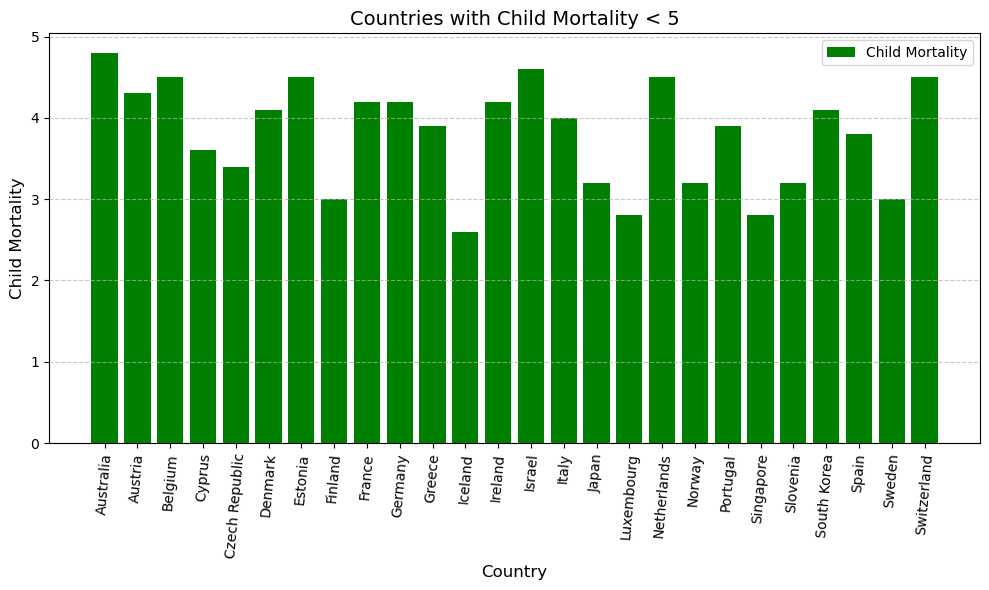

In [54]:
plot_bar_plot()

In [17]:
# Descriptive Statistics
stats = low_mort_data['child_mort'].describe()
stats

count    26.000000
mean      3.803846
std       0.650219
min       2.600000
25%       3.200000
50%       3.950000
75%       4.275000
max       4.800000
Name: child_mort, dtype: float64

In [51]:
def plot_scatter():
    """
    plot the sactter for GDP vs Life Expectancy
    """
    # Scatter Plot: GDP per capita vs Life Expectancy
    data_sorted = countries.sort_values('income') 
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data_sorted, x='gdpp', y='life_expec', hue='income', size='child_mort')
    plt.title("Life Expectancy vs GDP per Capita")
    plt.xlabel("GDP per Capita")
    plt.ylabel("Life Expectancy")
    plt.tight_layout
    plt.show()

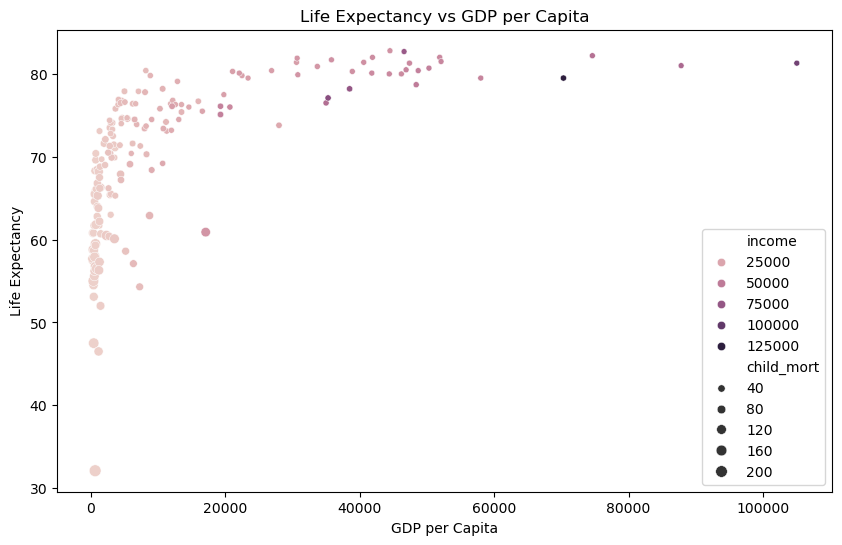

In [52]:
plot_scatter()

In [20]:
countries_select.corr()

,life_expec,health,income,inflation,gdpp
life_expec,1.000000,0.210692,0.611962,-0.239705,0.600089
health,0.210692,1.000000,0.129579,-0.255376,0.345966
income,0.611962,0.129579,1.000000,-0.147756,0.895571
inflation,-0.239705,-0.255376,-0.147756,1.000000,-0.221631
gdpp,0.600089,0.345966,0.895571,-0.221631,1.000000


In [49]:
def plot_histogram_plot():
    # Visualize distributions
    numeric_features = ['child_mort', 'exports', 'health', 'imports', 'income', 
                        'inflation', 'life_expec', 'total_fer', 'gdpp']
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(countries[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout() 
    plt.show()

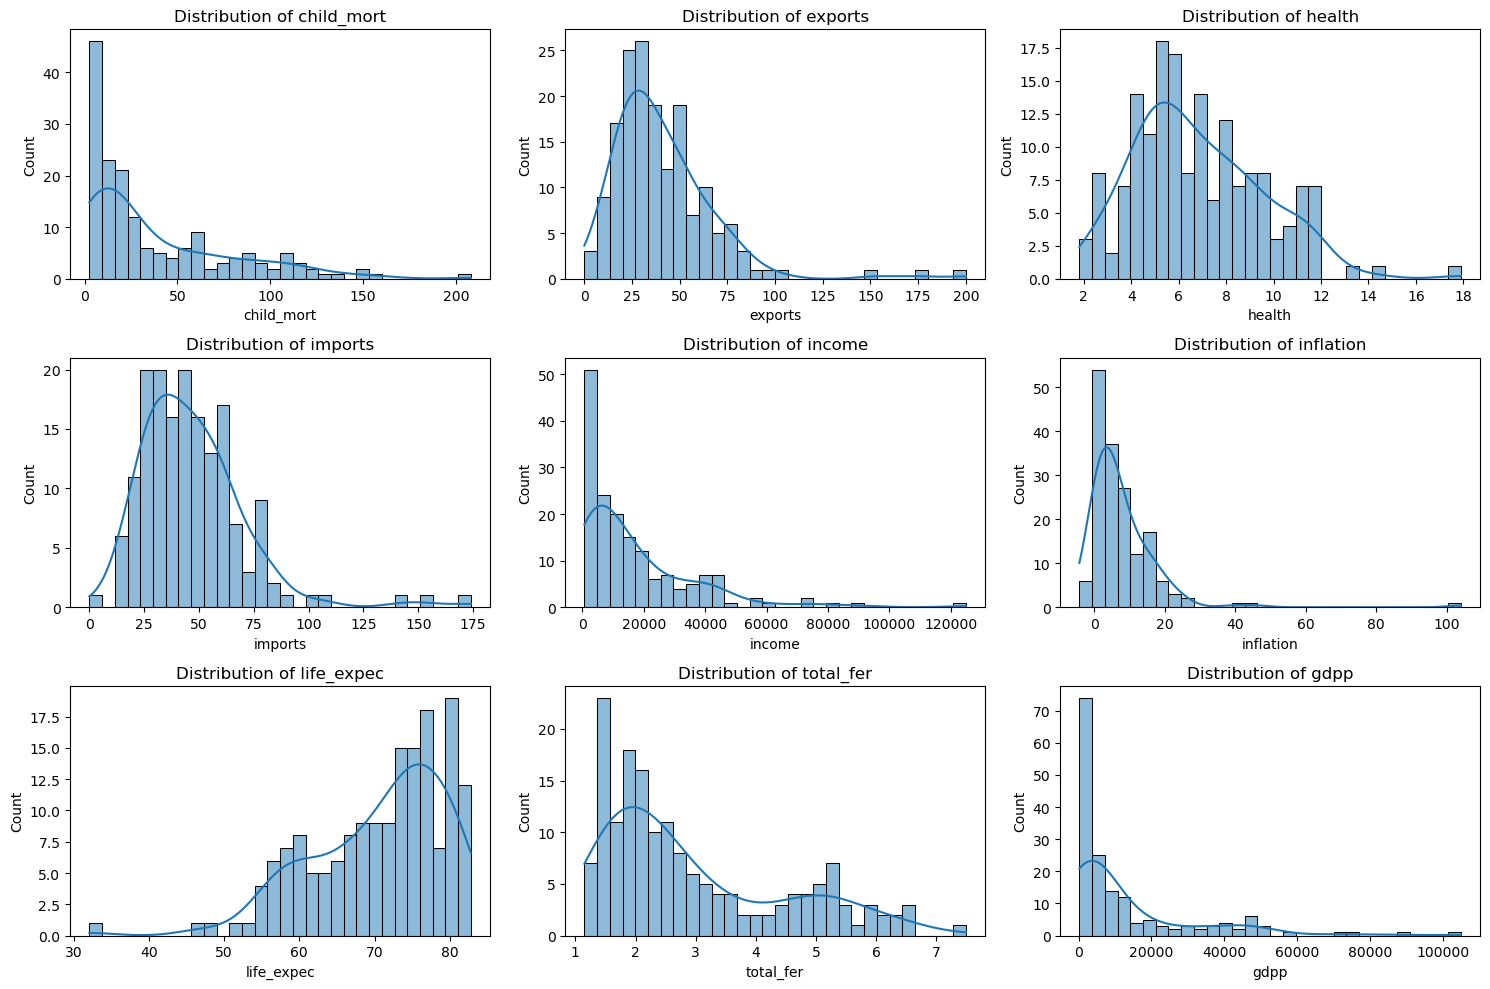

In [50]:
plot_histogram_plot()

In [55]:
def plot_heatmap():
    """
    Plot correlation for given dataset
    """
    fig, ax = plt.subplots(dpi=144)
    mask = np.triu(np.ones_like(countries.corr(numeric_only = True)))
    sns.heatmap(countries.corr(numeric_only = True), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.show()

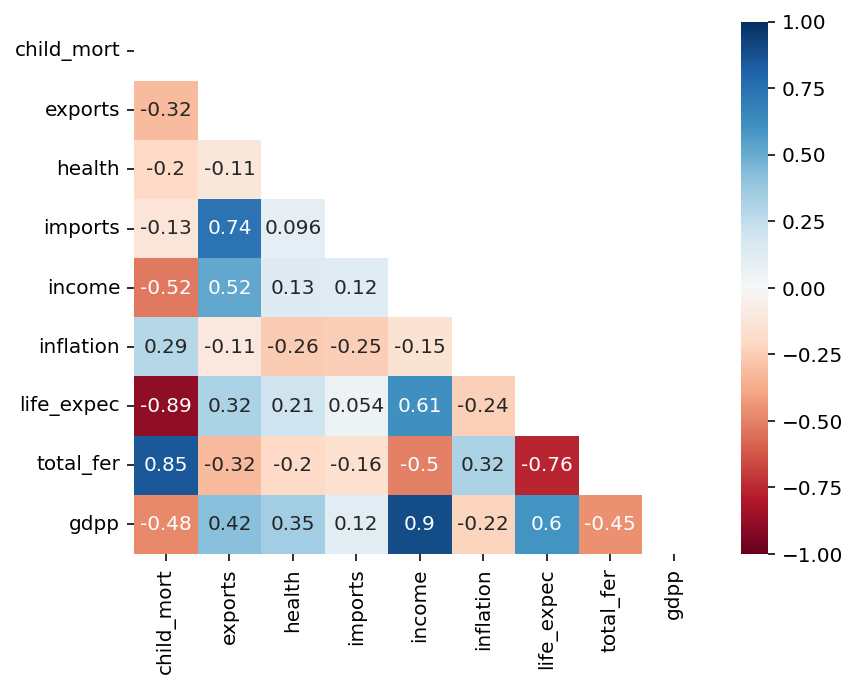

In [56]:
plot_heatmap()

In [135]:
def plot_box_plot():
    '''
    plot the box plot of gdp vs chils mortality by label
    '''
    countries['gdpp_quartile'] = pd.qcut(countries['gdpp'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=countries, x='gdpp_quartile', y='child_mort', palette='Set2')
    plt.title('Child Mortality by GDP Quartile', fontsize=14)
    plt.xlabel('GDP Quartile', fontsize=12)
    plt.ylabel('Child Mortality', fontsize=12)
    plt.show()

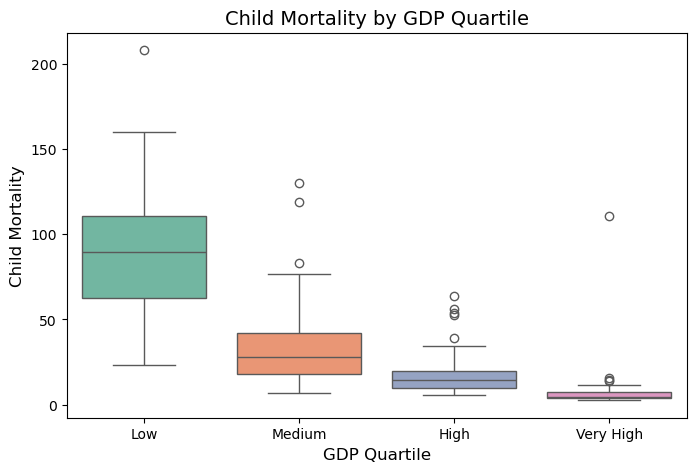

In [136]:
plot_box_plot()

In [31]:
numeric_features = ['child_mort', 'exports', 'health', 'imports', 'income', 
                        'inflation', 'life_expec', 'total_fer', 'gdpp']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(countries[numeric_features])
# print(countries[numeric_features]
# Convert scaled data back to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features)

# Verify scaling
print(scaled_df.describe())

         child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  2.127373e-16  5.504579e-16  2.765585e-16 -7.977650e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.939940e+00 -8.603259e-01   
25%   -7.466190e-01 -6.333367e-01 -6.922106e-01 -6.914785e-01 -7.174558e-01   
50%   -4.717981e-01 -2.235279e-01 -1.810007e-01 -1.487432e-01 -3.738080e-01   
75%    5.926666e-01  3.747198e-01  6.515412e-01  4.913530e-01  2.942370e-01   
max    4.221297e+00  5.813835e+00  4.047436e+00  5.266181e+00  5.611542e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean  -1.063687e-17  3.696311e-16  3.044803e-16  5.850277e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.137852e+00 -4.337186e+0

In [59]:
# Elbow Method
def plot_elbow_method(data, max_k=10):
    """
    Plots the elbow method max_k
    """
    inertia = []
    K_range = range(1, max_k+1)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal K')
    plt.xticks(K_range)
    plt.show()


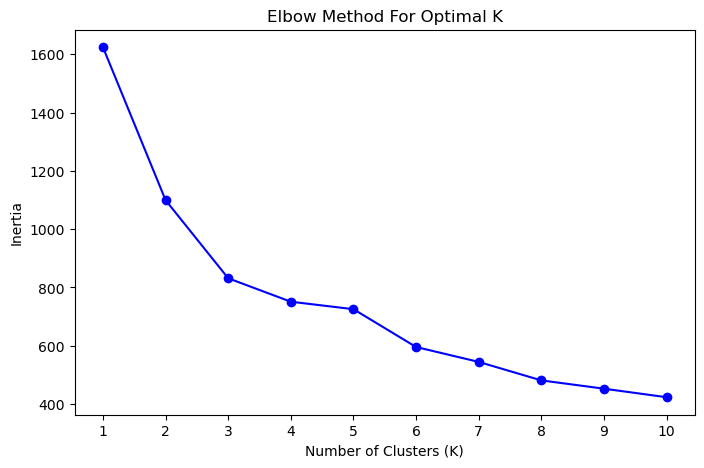

In [60]:
plot_elbow_method(scaled_df)

In [130]:
# Silhouette Score
def plot_silhouette_scores(data, max_k=10):
    """ 
    Calculates the silhoutte score for n clusters 
    """
    silhouette_avgs = []
    K_range = range(2, max_k+1)  # Silhouette score is undefined for K=1
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_avgs.append(silhouette_avg)
        print(f'K={k}, Silhouette Score={silhouette_avg:.4f}')
    
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, silhouette_avgs, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores For Various K')
    plt.xticks(K_range)
    plt.show()

K=2, Silhouette Score=0.3685
K=3, Silhouette Score=0.3464
K=4, Silhouette Score=0.3506
K=5, Silhouette Score=0.2680
K=6, Silhouette Score=0.2797
K=7, Silhouette Score=0.2015
K=8, Silhouette Score=0.2620
K=9, Silhouette Score=0.2098
K=10, Silhouette Score=0.2038


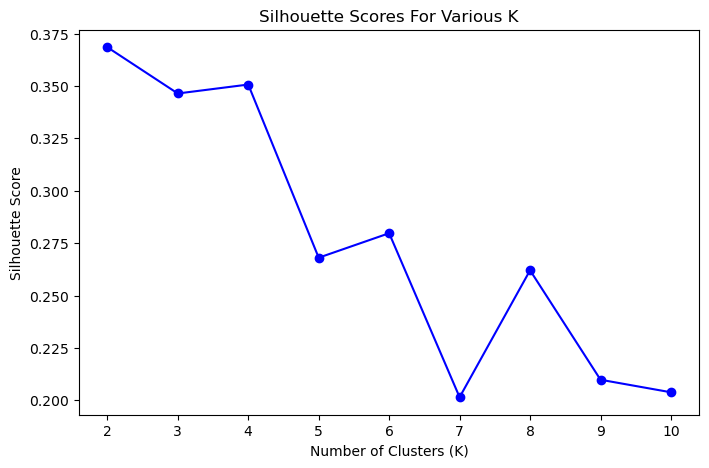

In [131]:
plot_silhouette_scores(scaled_df)

In [141]:
def plot_kmean_clustering():
    """
    Plots clustered data as a scatter plot 
    """
    # Applying KMeans Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    scaled_df['Cluster'] = kmeans.fit_predict(scaled_df)
    
    # Visualizing Clusters: Life Expectancy vs Child Mortality
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='health',y='life_expec',hue='Labels',legend='full',data=countries_kmeans, palette=['green','orange','cyan','indigo','red'])
    #sns.scatterplot(data=scaled_df, x='life_expec', y='child_mort', hue='Cluster', palette='viridis', s=100)
    plt.title('K-Mean Clustering: Health vs Life Expectancy ')
    plt.xlabel('Health')
    plt.ylabel('life_expec')
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.show()

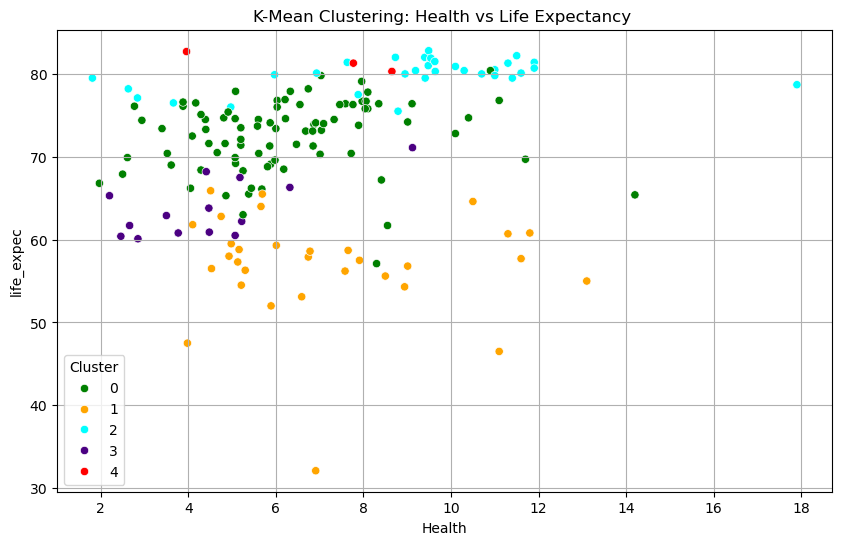

In [142]:
plot_kmean_clustering()

In [122]:
km = KMeans(n_clusters=5)
y = km.fit_predict(scaled_df)

In [123]:
new_df_sort_health = countries.sort_values(by='health', ascending=False)
countries_kmeans = countries.copy()
countries_kmeans['Labels'] = y
countries_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,gdpp_quartile,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Medium,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Medium,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Medium,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,High,0


In [124]:
countries_kmeans['Labels'].value_counts()

Labels
0    86
2    33
1    31
3    14
4     3
Name: count, dtype: int64

In [126]:
def linear_regression():
    """
    Plots regression line
    """
    X = countries_kmeans[['health']]
    y = countries_kmeans[['life_expec']]

    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title('Linear Regression: Health vs Life Expectancy')
    plt.xlabel('Health')
    plt.ylabel('Life Expectancy')
    plt.legend()
    plt.grid()
    plt.show()

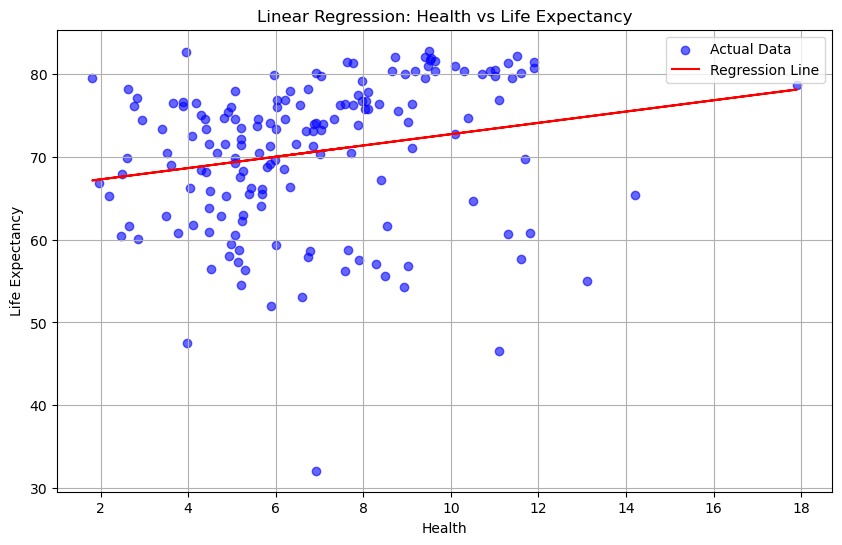

In [127]:
linear_regression()